In [110]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.cm as cm
from IPython.display import Image
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.mixture import GaussianMixture
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False
from sklearn.cluster import MeanShift

In [111]:
df = pd.read_excel('세종시_우선행정동설정기준모음.xlsx')

In [112]:
df['배달합'] = df['중식 배달평균'] + df['한식 배달평균'] + df['카페 배달평균'] + df['치킨 배달평균']

In [113]:
df

,Unnamed: 0,행정구역,2022년06월_총인구수,한식 배달평균,한식 배달 전년,한식 배달 전월,일일 평균 유동인구,카페 월 최고매출,카페 매출 전년대비,카페 배달평균,...,치킨 배달평균,Unnamed: 17,치킨 업소,상가수,위도,경도,처리량,군집,공시지가,배달합
0,15,세종특별자치시 고운동,34624,185,-31.000,-9.300,4859,1344.0,1.8,116,...,450,1202,11.0,147,36.519699,127.236094,91080,1,7.364577e+05,1202
1,12,세종특별자치시 금남면,8779,89,-16.000,39.100,3810,1247.0,-1.3,262,...,269,1233,9.0,185,36.463831,127.280368,186461,1,1.973873e+05,1233
2,14,세종특별자치시 다정동,28192,277,37.800,15.400,1975,1684.0,-17.0,226,...,355,2026,4.0,84,36.494746,127.247773,36000,1,6.242617e+05,2026
3,16,세종특별자치시 대평동,11293,191,-38.200,-28.700,2287,790.0,40.0,154,...,335,1067,2.0,85,36.472039,127.271607,50110,2,1.719385e+05,1067
4,21,세종특별자치시 도담동,34898,240,-17.000,-4.400,7335,1994.0,-1.5,173,...,342,1045,21.0,443,36.515736,127.261913,279345,3,1.144995e+06,1045
5,0,세종특별자치시 반곡동,23634,100,0.000,0.000,2791,NaN,NaN,185,...,443,1257,NaN,62,36.498581,127.310541,50699,1,6.794789e+01,1257
6,10,세종특별자치시 보람동,18826,184,9.500,-4.200,1337,1082.0,15.4,247,...,468,1492,8.0,257,36.478659,127.290777,61430,1,3.176040e+05,1492
7,17,세종특별자치시 부강면,6038,180,33.300,19.200,2507,1477.0,-7.3,140,...,226,791,11.0,147,36.529479,127.371066,27682,2,1.538746e+05,791
8,11,세종특별자치시 새롬동,39243,247,0.065,0.051,2364,1313.0,20.2,213,...,381,1519,15.0,540,36.484964,127.251939,159425,3,3.433028e+05,1519
9,19,세종특별자치시 소담동,21537,225,48.000,0.000,586,1172.0,5.3,166,...,438,1317,5.0,89,36.484039,127.300541,49200,1,3.912839e+05,1317


In [114]:
df.columns

Index(['Unnamed: 0', '행정구역', '2022년06월_총인구수', '한식 배달평균', '한식 배달 전년',
       '한식 배달 전월', '일일 평균 유동인구', '카페 월 최고매출', '카페 매출 전년대비', '카페 배달평균',
       '카페 배달 전년', '카페 업소', '카페 업소 전년', '중식 월 최고매출', '중식 매출 전년대비', '중식 배달평균',
       '치킨 배달평균', 'Unnamed: 17', '치킨 업소', '상가수', '위도', '경도', '처리량', '군집',
       '공시지가', '배달합'],
      dtype='object')

In [115]:
df = df[['2022년06월_총인구수','배달합','상가수','처리량']]

In [116]:
df

,2022년06월_총인구수,배달합,상가수,처리량
0,34624,1202,147,91080
1,8779,1233,185,186461
2,28192,2026,84,36000
3,11293,1067,85,50110
4,34898,1045,443,279345
5,23634,1257,62,50699
6,18826,1492,257,61430
7,6038,791,147,27682
8,39243,1519,540,159425
9,21537,1317,89,49200


In [119]:
df
feature_names = ['2022년06월_총인구수','배달합','상가수','처리량']
df = pd.DataFrame(df, columns=feature_names)
df.head(3)

,2022년06월_총인구수,배달합,상가수,처리량
0,34624,1202,147,91080
1,8779,1233,185,186461
2,28192,2026,84,36000


In [120]:
feature_names = ['2022년06월_총인구수', '배달합', '상가수', '처리량']

df = pd.DataFrame(data=df, columns=feature_names)

df.head(3)

,2022년06월_총인구수,배달합,상가수,처리량
0,34624,1202,147,91080
1,8779,1233,185,186461
2,28192,2026,84,36000


In [121]:
df_c = df
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
scaler = StandardScaler()
scaled=scaler.fit_transform(df_c)
df_c=pd.DataFrame(scaled)

In [122]:
df_c

,0,1,2,3
0,1.358788,0.080515,-0.142318,-0.076081
1,-0.666289,0.164094,0.058998,1.032550
2,0.854811,2.302100,-0.476079,-0.716286
3,-0.469305,-0.283458,-0.470781,-0.552283
4,1.380257,-0.342772,1.425828,2.112158
5,0.497670,0.228801,-0.592630,-0.545437
6,0.120940,0.862384,0.440439,-0.420709
7,-0.881059,-1.027581,-0.142318,-0.812968
8,1.720708,0.935178,1.939713,0.718306
9,0.333360,0.390567,-0.449590,-0.562860


In [123]:
from sklearn.cluster import estimate_bandwidth

In [135]:
X, y = make_blobs(n_samples=22, n_features=4, centers=4, \
                  cluster_std=0.5, random_state=0)

meanshift = MeanShift(bandwidth=0.9)
cluster_labels = meanshift.fit_predict(df_c)
# print(cluster_labels)
print('cluster labels 유형 :',np.unique(cluster_labels))

cluster labels 유형 : [ 0  1  2  3  4  5  6  7  8  9 10 11 12]


In [136]:
from sklearn.cluster import estimate_bandwidth

# quantile : MeanShift 방식으로 sampling 할 때
#            sample data 개수를 filtering 할 때 지정하는 파라미터
#            이 값이 크면 sampling 할 때 제외되는 data 값들이 많아짐
#            data 개수가 많은 경우에는 이 값을 크게 해서
#            estimate 할 때 사용하는 data 개수를 줄여서 시간이 오래 걸리지 않도록 함
best_bandwidth = estimate_bandwidth(df_c, quantile=0.5)
print(f'best_bandwidth : {best_bandwidth:.4f}')

best_bandwidth : 3.3482


In [137]:
df = pd.DataFrame(data=df_c)
df.head(3)
df.head(3)

# 최적 bandwidth 값 구하기
best_bandwidth = estimate_bandwidth(df_c, quantile=0.25)
print(f'best_bandwidth : {best_bandwidth:.4f}')

meanshift = MeanShift(bandwidth=best_bandwidth)
cluster_labels = meanshift.fit_predict(df_c)
print('cluster labels 유형 :',np.unique(cluster_labels))
cluster_labels

best_bandwidth : 2.2645
cluster labels 유형 : [0 1 2 3 4]


array([0, 0, 0, 0, 3, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 4, 0, 0, 1, 0, 0, 0],
      dtype=int64)

In [138]:
df_c['meahshift_labels'] = cluster_labels
df_c.head(3)

,0,1,2,3,meahshift_labels,pca_X,pca_Y
0,1.358788,0.080515,-0.142318,-0.076081,0,-0.136665,-0.961366
1,-0.666289,0.164094,0.058998,1.032550,0,-0.312584,0.346343
2,0.854811,2.302100,-0.476079,-0.716286,0,0.284927,-1.999681


In [139]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
transformed_pca = pca.fit_transform(df_c)

type(transformed_pca)
transformed_pca.shape

df_c['pca_X'] = transformed_pca[:, 0]
df_c['pca_Y'] = transformed_pca[:, 1]

In [140]:
df_c['meahshift_labels']=df_c['meahshift_labels'].apply(lambda x: 3 if x>=3 else x)

In [143]:
df_c

,0,1,2,3,meahshift_labels,pca_X,pca_Y
0,1.358788,0.080515,-0.142318,-0.076081,0,0.074099,-1.286447
1,-0.666289,0.164094,0.058998,1.032550,0,-0.241884,0.521625
2,0.854811,2.302100,-0.476079,-0.716286,0,0.194752,-2.971752
3,-0.469305,-0.283458,-0.470781,-0.552283,0,-1.550139,0.119202
4,1.380257,-0.342772,1.425828,2.112158,3,5.581116,1.559598
5,0.497670,0.228801,-0.592630,-0.545437,0,-0.962193,-0.944543
6,0.120940,0.862384,0.440439,-0.420709,0,0.232588,-1.336482
7,-0.881059,-1.027581,-0.142318,-0.812968,0,-1.898387,0.810840
8,1.720708,0.935178,1.939713,0.718306,2,4.622153,-1.322959
9,0.333360,0.390567,-0.449590,-0.562860,0,-0.939092,-1.045036


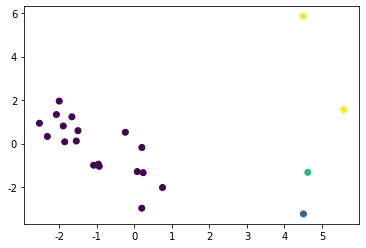

In [144]:
plt.scatter(x=df_c.loc[:, 'pca_X'], y=df_c.loc[:, 'pca_Y'], c=df_c['meahshift_labels'])